In [24]:
import os
import kaggle #conda install -c kaggle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

%matplotlib inline

In [25]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

In [26]:
with open('rotten.pkl', 'rb') as f:
    df_rotten_tomatoes=pickle.load(f)

In [27]:
df_rotten_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 17711
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

In [28]:
df_rotten_tomatoes.movie_title=df_rotten_tomatoes.movie_title.str.lower()

In [29]:
df_rotten_tomatoes.movie_title=df_rotten_tomatoes.movie_title.str.replace('&', 'and')

In [30]:
with open('oscar.pkl', 'rb') as f:
    df_oscars=pickle.load(f)

In [31]:
df_oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
 7   nominee        10395 non-null  bool  
dtypes: bool(2), int64(3), object(3)
memory usage: 507.7+ KB


In [32]:
df_oscars.film=df_oscars.film.str.lower()

In [33]:
df_oscars.film=df_oscars.film.str.replace('&', 'and')

In [34]:
drop_cols=['year_ceremony', 'ceremony', 'category', 'name', 'winner']
df_nominee=df_oscars.drop(columns=drop_cols)

In [35]:
df_nominee = df_nominee.drop_duplicates(subset=['film','nominee'])
df_nominee.nominee.value_counts()

True    4833
Name: nominee, dtype: int64

In [36]:
df_nominee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 0 to 10386
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_film  4833 non-null   int64 
 1   film       4832 non-null   object
 2   nominee    4833 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 118.0+ KB


In [37]:
drop_cols=['year_ceremony', 'ceremony', 'category', 'name', 'nominee']
df_winner=df_oscars.drop(columns=drop_cols)

df_winner = df_winner.drop_duplicates(subset=['film','winner'])
df_winner=df_winner[df_winner.winner.isin([True])]
df_winner.winner.value_counts()

True    1274
Name: winner, dtype: int64

In [38]:
df_winner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 1 to 10382
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_film  1274 non-null   int64 
 1   film       1273 non-null   object
 2   winner     1274 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 31.1+ KB


In [39]:
df_rotten_tomatoes_oscars = df_rotten_tomatoes.merge(df_nominee, left_on=['movie_title'],right_on=['film'], how='left')

In [40]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

In [41]:
df_rotten_tomatoes_oscars = df_rotten_tomatoes_oscars.merge(df_winner, left_on=['movie_title'],right_on=['film'], how='left')

In [42]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

In [48]:
drop_cols=['year_film_x','year_film_y','film_x','film_y' ]
df_rotten_tomatoes_oscars=df_rotten_tomatoes_oscars.drop(columns=drop_cols)

In [49]:
df_rotten_tomatoes_oscars.loc[df_rotten_tomatoes_oscars['nominee'].isnull(),'nominee']=False

In [50]:
df_rotten_tomatoes_oscars.loc[df_rotten_tomatoes_oscars['winner'].isnull(),'winner']=False

In [51]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

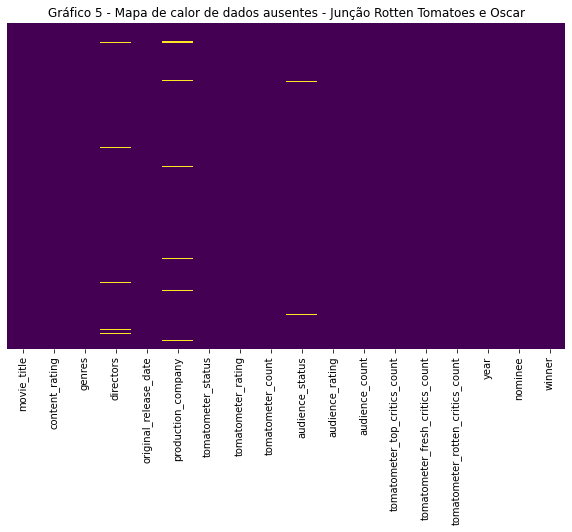

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_rotten_tomatoes_oscars.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title='Gráfico 5 - Mapa de calor de dados ausentes - Junção Rotten Tomatoes e Oscar');

In [54]:
 with open('oscar_rotten.pkl', mode = 'wb') as f:
  pickle.dump(df_rotten_tomatoes_oscars, f)